# Analiza i Bazy Danych
## Karol Musiał, grupa 3a
### Laboratorium 7
## "Modele Liniowe"

In [8]:
# Import Modułów
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [18]:
def linear_reg(name, X_name, y_name):
    
    # Odczytanie danych
    data = pd.read_csv(name)
    DF = pd.DataFrame(data)

    # Wstępny wykres
    DF.plot.scatter(x=X_name,y=y_name,marker='o')
    plt.suptitle('Wykres wstepny')
    plt.show()

    # Dzielenie na podzbiory
    X = DF[X_name]
    y = DF[y_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, train_size=0.3)
    X_train = np.array(X_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    y_train = np.array(y_train).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)

    # Tworzenie modelu
    model1 = LinearRegression()
    model1.fit(X_train, y_train)

    # Wypisywanie wskaznikow
    print("\nCoef = {a}".format(a=model1.coef_))
    print("Intercept = {a}\n".format(a=model1.intercept_))
    # Coef to współczynniki wielomianu opisującego zmienne zależne i niezależne
    # Intercept to wartości zmiennych niezależnych dla zmiennych zależnych równych 0
    # W interpretacji geometrycznej, coef to nachylenie prostej, a intercept to miejsce przecięcia z osią Y

    # Predykcja czesci testowej
    y_pred = model1.predict(X_test)
    print("Roznica miedzy predykcja a rzeczywistym wynikiem : \n{a}\n".format(a=(y_pred - y_test).T))

    # Wykresy
    plt.scatter(X_test, y_test, label='y_test')
    plt.plot(X_test, y_pred, 'r', label='y_pred')
    plt.legend()
    plt.suptitle('Regresja liniowa')
    plt.show()

    # Walidacja danych
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('\nŚredni błąd bezwzględny = {a}'.format(a=mae))
    print('Błąd średniokwadratowy = {a}'.format(a=mse))
    print('Pierwiastek błędu średniokwadratowego = {a}'.format(a=rmse))
    

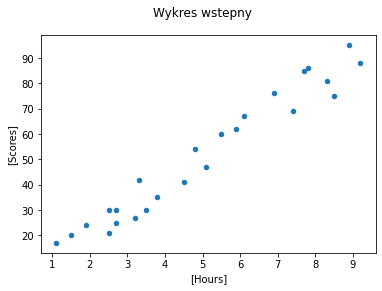


Coef = [[9.74488325]]
Intercept = [3.86667628]

Roznica miedzy predykcja a rzeczywistym wynikiem : 
[[-4.89362929  0.17786106 -0.63851254 11.69818391  5.51960219 -3.35788412
   5.17786106 -6.09772269 -1.7711156  -3.68953589  6.71865091  8.05030268
   6.56558086 -4.40386278 -5.97520899  3.74920726  7.97376766  5.89723263]]



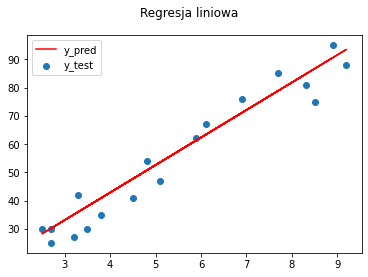


Średni błąd bezwzględny = 5.13087345056212
Błąd średniokwadratowy = 33.57135209540177
Pierwiastek błędu średniokwadratowego = 5.794079054983783


In [19]:
linear_reg('SCORES.csv', ['Hours'], ['Scores'])
#linear_reg('SBP.csv', ['Age'], ['SBP'])

In [38]:
def multiple_linear_reg(name, X_name, y_name):
    
    # Odczytanie danych
    data = pd.read_csv(name)
    DF = pd.DataFrame(data)
    
    # Dzielenie na podzbiory
    X = DF[X_name]
    y = DF[y_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, train_size=0.3, random_state=0)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    # Tworzenie modelu
    model2 = LinearRegression()
    model2.fit(X_train, y_train)
    
    # Wypisywanie wskaznikow
    print("\nCoef = {a}".format(a=model2.coef_))
    print("Intercept = {a}\n".format(a=model2.intercept_))
    
    # Predykcja czesci testowej
    y_pred = model2.predict(X_test)
    print("Roznica miedzy predykcja a rzeczywistym wynikiem : \n{a}\n".format(a=(y_pred - y_test).T))
    
    # Walidacja danych
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('\nŚredni błąd bezwzględny = {a}'.format(a=mae))
    print('Błąd średniokwadratowy = {a}'.format(a=mse))
    print('Pierwiastek błędu średniokwadratowego = {a}'.format(a=rmse))

In [40]:
multiple_linear_reg('PETROL.csv', ['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy'], ['Zuzycie_paliwa'])


Coef = [[-4.25828099e+01 -9.64961393e-02 -3.99171321e-03  1.64357272e+03]]
Intercept = [416.46906213]

Roznica miedzy predykcja a rzeczywistym wynikiem : 
[[-56.53894144 133.70319583  45.21448396  19.95133347 127.18200174
  -24.00953873  34.83707906 112.4370323   14.52880253 -80.52120946
  -62.29198939  59.59920747  27.74487434  10.43352587  47.25948598
   46.20751342 101.48961601 -35.35073673 -11.42163915  -0.8382952
  -73.22786833  15.68872903 -23.97602992  84.60025504  48.02046464
   17.90129456  73.91179262 -16.67947407 -48.68234524 -85.71483082
  127.93200902 101.09194119 132.37155398  49.4955237 ]]


Średni błąd bezwzględny = 57.3780768898788
Błąd średniokwadratowy = 4798.872014755159
Pierwiastek błędu średniokwadratowego = 69.2738912921395


In [82]:
# 2. Import Danych
data = pd.read_csv('HEART.csv')
DF = pd.DataFrame(data)
print(DF.head())

# 3. Przetworzenie danych
DF = DF.replace('?', np.nan)
del DF['slope']
del DF['ca']
del DF['thal']
print(DF.head())

DF = DF.dropna()
print(DF.head())

   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  num         
0    ?           0  
1    ?           0  
2    ?           0  
3    6           0  
4    ?           0  
   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak  num       
0   28    1   2      130  132   0       2     185     0      0.0           0
1   29    1   2      120  243   0       0     160     0      0.0           0
2   29    1   2      140  NaN   0       0     170     0      0.0           0
3   30    0   1      170  237   0       1     170     0      0.0           0
4   31    0   2      100  

In [ ]:
#4. 

